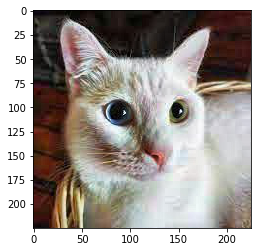

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import cv2
#array
im = np.array(Image.open('cat1.jpg'), dtype=np.uint8)
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im)


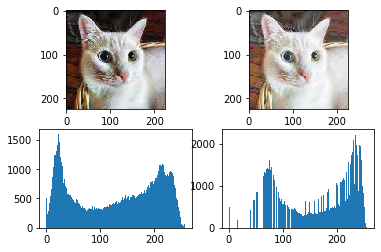

In [14]:
#adding_illumination
def adding_illumination(image, gamma=1.0):
    invGamma= 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(cv2.LUT(image, table))
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(cv2.LUT(image, table).ravel(),256,[0,256])
    return cv2.LUT(image, table)
image = np.array(Image.open('cat1.jpg'), dtype=np.uint8)
img=adding_illumination(image,2)

In [17]:
import os
import cv2
from PIL import Image
import numpy as np
import cv2
import pandas as pd  
import matplotlib.pyplot as plt

In [18]:
def rotation(img):
    #Image.fromarray(np.rot90(img)).save("rotate_cat.jpg")
    rot_image=Image.fromarray(np.rot90(img,np.random.randint(1,4)))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(img)
    ax[0][1].imshow(rot_image)
    ax[1][0].hist(img.ravel(),256,[0,256])
    ax[1][1].hist(np.array(rot_image).ravel(),256,[0,256])
    return (np.rot90(img,np.random.randint(1,4)))
def color_modification(image,n):
    image[image[:, :, 2] < 255, 2] = n
    return image
def random_crop(image, crop_size):
    #crop_size = check_size(cropsize)
    h, w,  = image.shape[:2]
    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])
    bottom = top + crop_size[0]
    right = left + crop_size[1]
    image = image[top:bottom, left:right, :]
    #return  Image.fromarray(image)
    return image
def adding_illumination(image, gamma=1.0):
    invGamma= 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(cv2.LUT(image, table))
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(cv2.LUT(image, table).ravel(),256,[0,256])
    return cv2.LUT(image, table)
def translation_along_x(image):
    # Store height and width of the image
    height, width = image.shape[:2]
    quarter_height, quarter_width = height /200 , width/-4
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    # We use warpAffine to transfor
    # the image using the matrix, T
    img_translation = cv2.warpAffine(image, T, (width, height))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(img_translation)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(np.array(img_translation).ravel(),256,[0,256])
    return img_translation
def translation_along_y(image):
    height, width = image.shape[:2]
    quarter_height, quarter_width = height /3 , width/200
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    # We use warpAffine to transform
    # the image using the matrix, T
    img_translation = cv2.warpAffine(image, T, (width, height))
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(img_translation)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(np.array(img_translation).ravel(),256,[0,256])
    return img_translation
def noise(img,par):
    img=img[...,::-1]/255.0
    noise =np.random.normal(loc=0, scale=1, size=img.shape)
    # noise overlaid over image
    noisy = np.clip((img + noise*par),0,1)
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(noisy)
    return noisy
def scale(im, nR, nC):
    number_rows = len(im)     
    number_columns = len(im[0]) 
    return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  for c in range(nC)] for r in range(nR)]

def zoom(img, zoom_factor=0):
    if zoom_factor == 0:
        return img
    height, width = img.shape[:2] 
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    y1, x1 = max(0, new_height - height) // 2, max(0, new_width - width) // 2
    y2, x2 = y1 + height, x1 + width
    bbox = np.array([y1,x1,y2,x2])
    bbox = (bbox / zoom_factor).astype(np.int)
    y1, x1, y2, x2 = bbox
    cropped_img = img[y1:y2, x1:x2]
    resize_height, resize_width = min(new_height, height), min(new_width, width)
    pad_height1, pad_width1 = (height - resize_height) // 2, (width - resize_width) //2
    pad_height2, pad_width2 = (height - resize_height) - pad_height1, (width - resize_width) - pad_width1
    pad_spec = [(pad_height1, pad_height2), (pad_width1, pad_width2)] + [(0,0)] * (img.ndim - 2)
    result = scale(cropped_img, resize_width, resize_height)
    result = np.pad(result, pad_spec, mode='constant')
    return result
def cropping (image):
    crop=image[50:125,20:180]
    plt.imshow(crop)
    return crop
def Horizonta_flipping(image):
    flip_h=image[:,::-1]
    #plt.imshow(flip_v, interpolation='nearest')
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow(flip_h)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(flip_h.ravel(),256,[0,256])
    return flip_h
def vertical_flipping(image):
    flip_v=image[-1::-1,::]
    fig, ax = plt.subplots(2, 2)
    ax[0][0].imshow(image)
    ax[0][1].imshow( flip_v)
    ax[1][0].hist(image.ravel(),256,[0,256])
    ax[1][1].hist(flip_v.ravel(),256,[0,256])
    return flip_v

C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

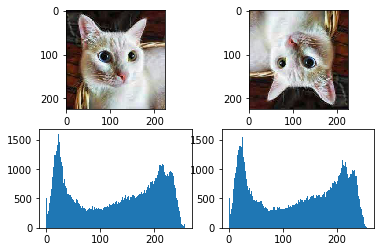

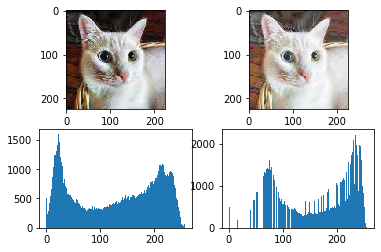

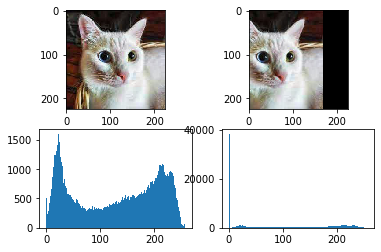

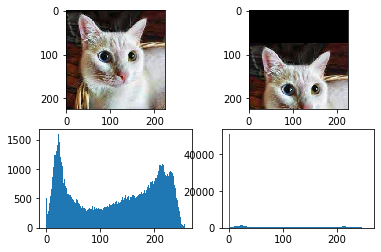

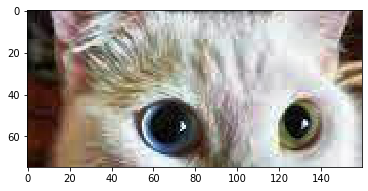

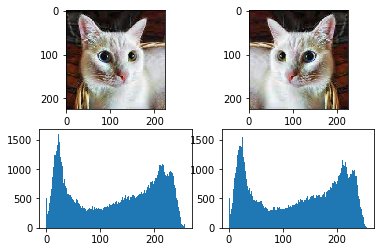

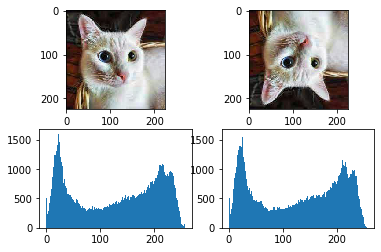

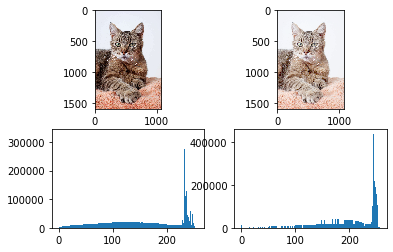

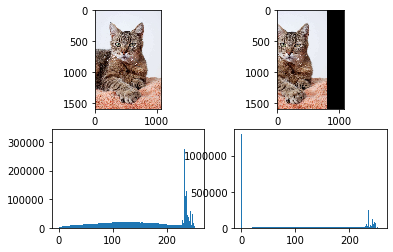

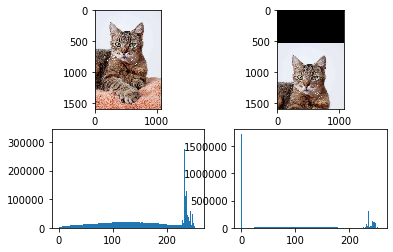

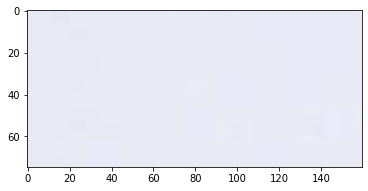

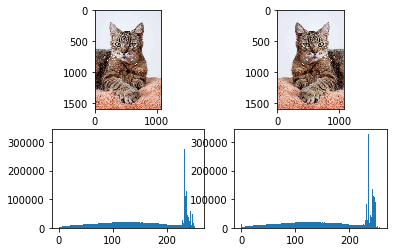

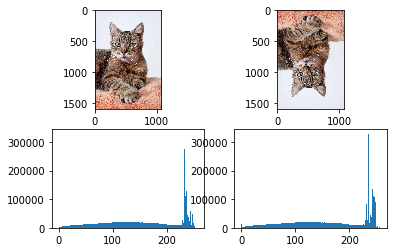

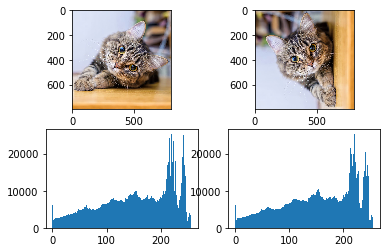

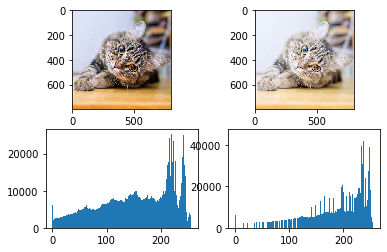

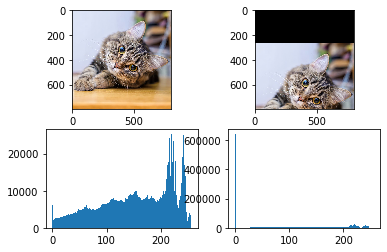

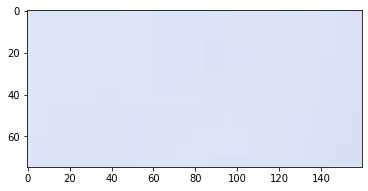

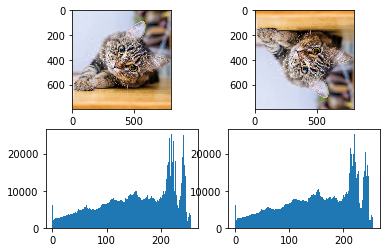

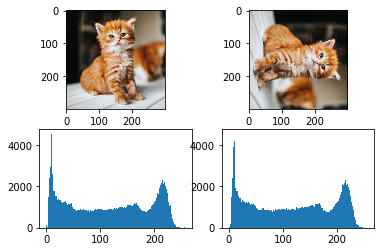

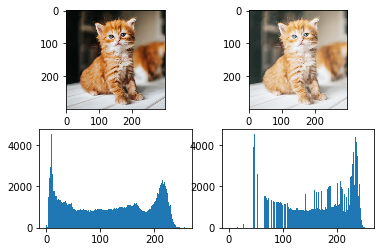

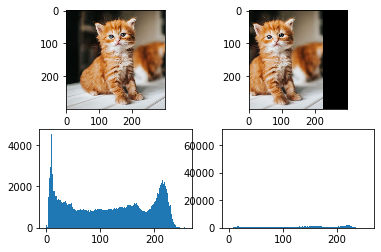

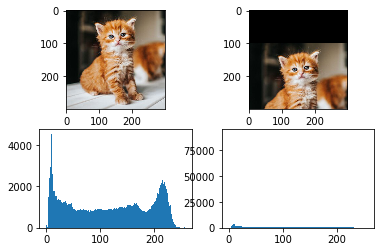

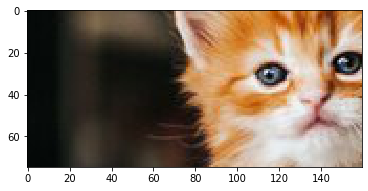

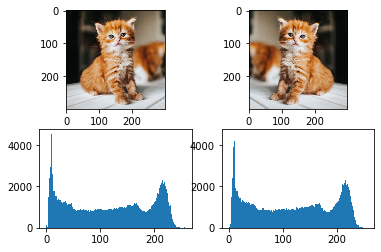

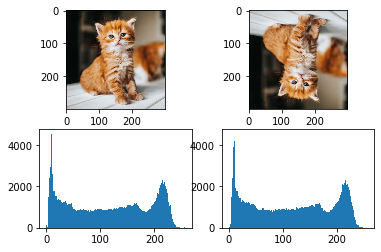

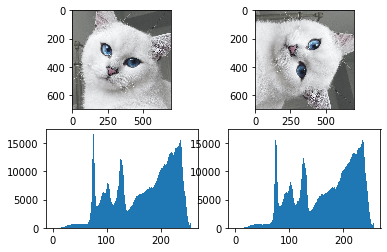

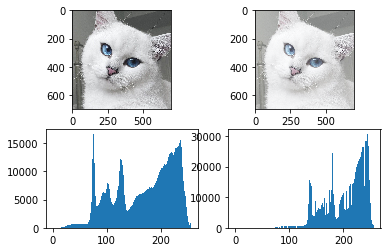

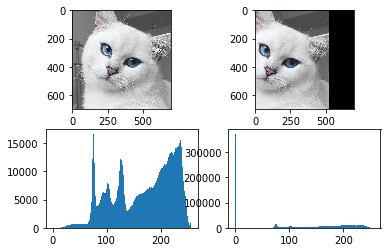

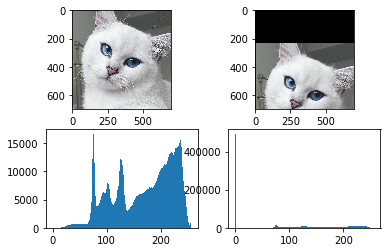

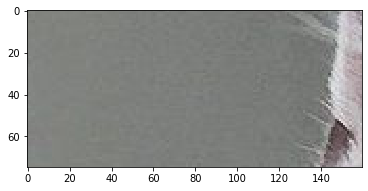

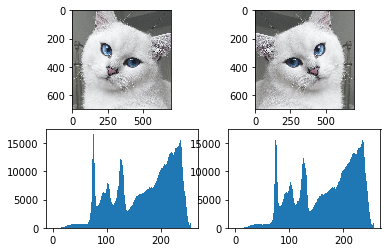

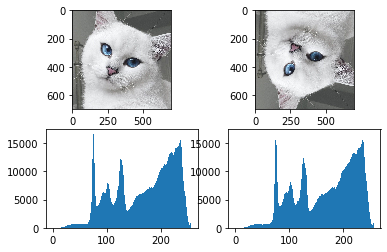

In [21]:
#cats
directory="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/images/cats"
directory_save="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/train/cats/"
directory_save_test="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/test/cats/"
def application_transformation(directory,directory_save,directory_save_test):
    i=0
    for filename in os.listdir(directory):
        i+=1
        image = Image.open(directory+"/"+filename)
        image=image.resize((300,300))
        image.save(directory_save+filename)
        #image = Image.open(directory+"/"+filename)
        im=np.array(Image.open(directory+"/"+filename), dtype=np.uint8)
        Image.fromarray(rotation(im)).save(directory_save+"Image_rotation"+str(i)+".jpg",'JPEG')
        Image.fromarray(random_crop(im, [70,120])).save(directory_save+"Image_crop"+str(i)+".jpg",'JPEG')
        Image.fromarray(adding_illumination(im,2)).save(directory_save+"Image_illumination"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_x(im)).save(directory_save+"Image_translation_along_x"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_y(im)).save(directory_save+"Image_translation_along_y"+str(i)+".jpg",'JPEG') 
        Image.fromarray((noise(im,0.2)* 255).astype(np.uint8)).save(directory_save+"Image_noise"+str(i)+".jpg",'JPEG') 
        Image.fromarray(zoom(im, 1.2)).save(directory_save+"Image_zoom"+str(i)+".jpg",'JPEG')  
        Image.fromarray(cropping(im)).save(directory_save_test+"Image_cropp"+str(i)+".jpg",'JPEG')       
        Image.fromarray(Horizonta_flipping(im)).save(directory_save_test+"Image_fliph"+str(i)+".jpg",'JPEG')
        Image.fromarray(vertical_flipping(im)).save(directory_save_test+"Image_flipv"+str(i)+".jpg",'JPEG') 
        Image.fromarray(color_modification(im,np.random.randint(1,255))).save(directory_save+"Image_colorm"+str(i)+".jpg",'JPEG') 
application_transformation(directory,directory_save,directory_save_test)  

C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\bilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

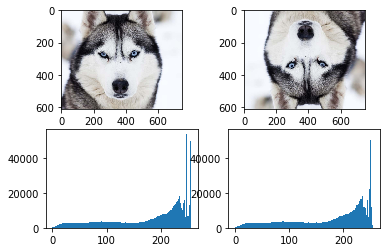

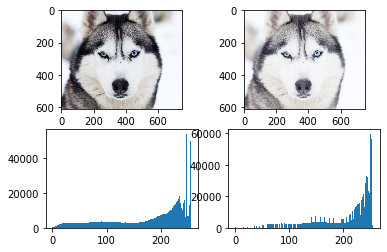

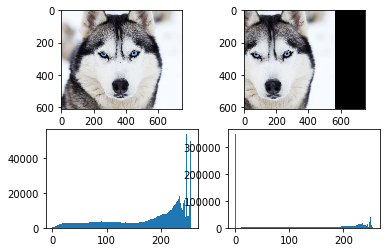

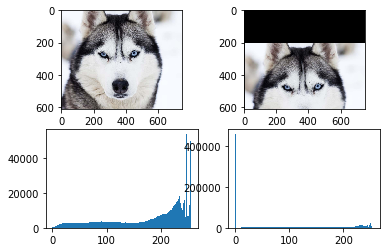

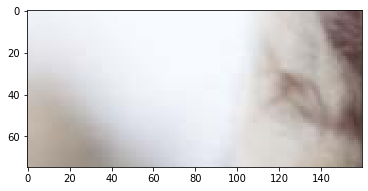

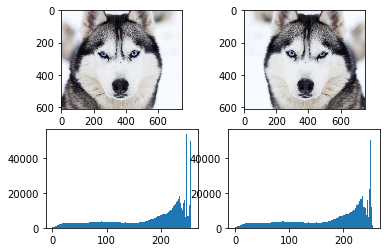

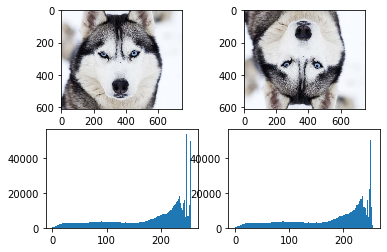

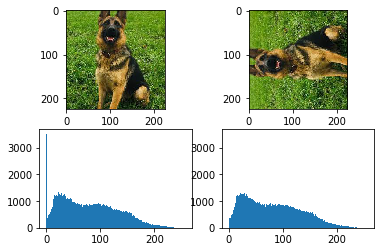

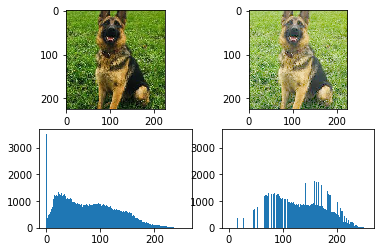

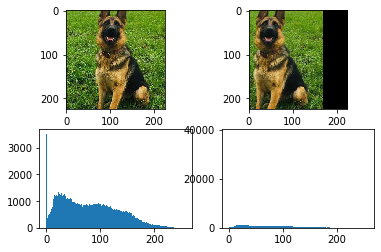

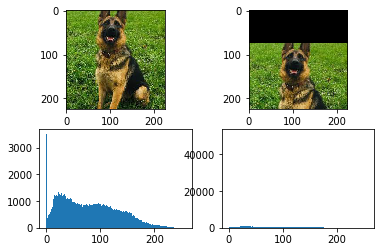

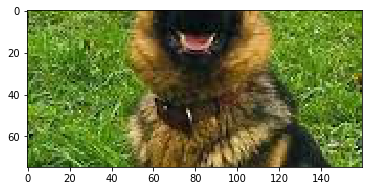

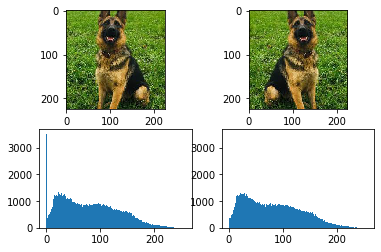

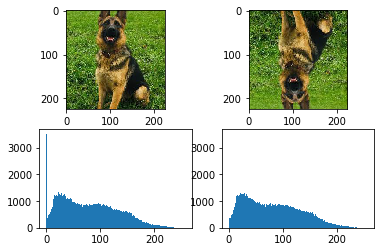

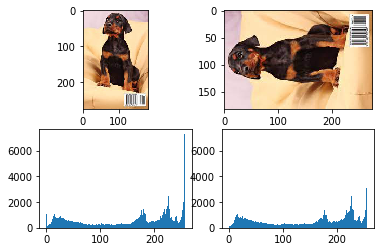

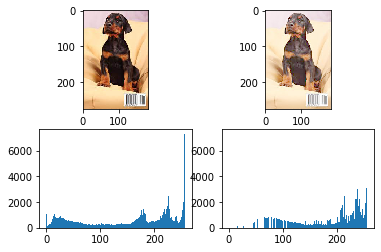

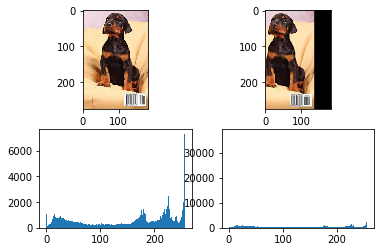

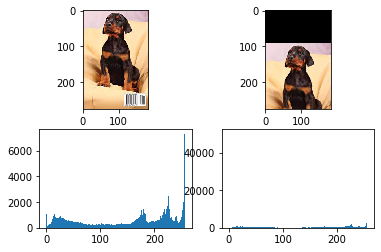

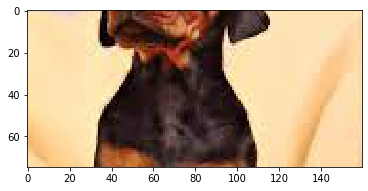

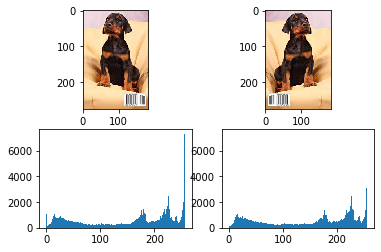

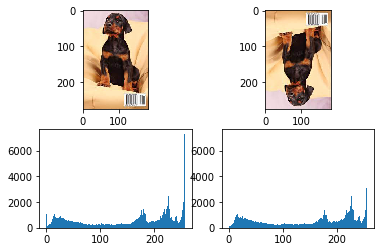

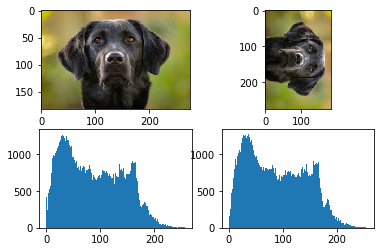

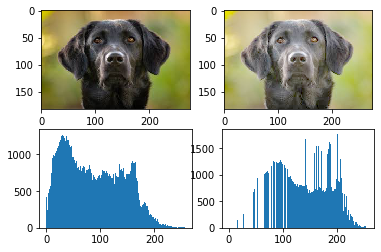

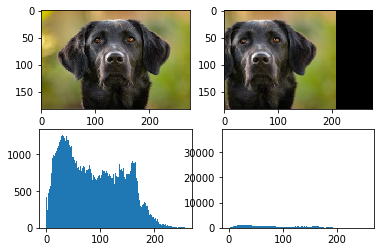

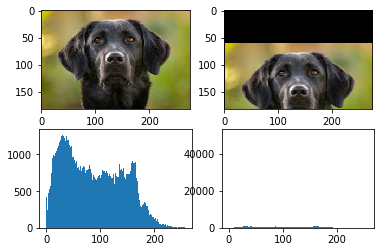

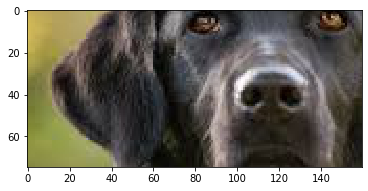

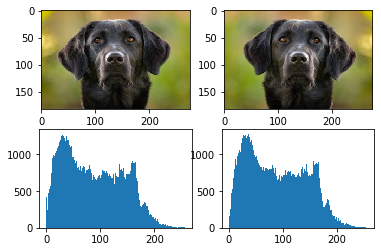

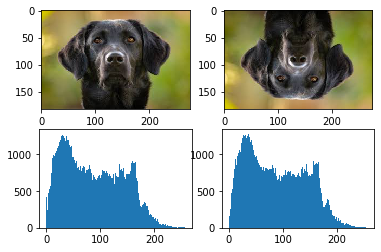

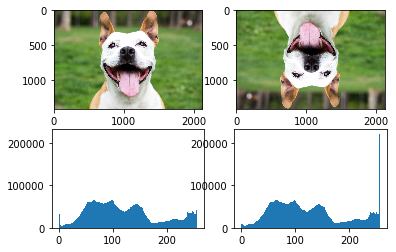

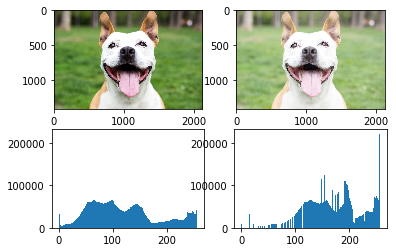

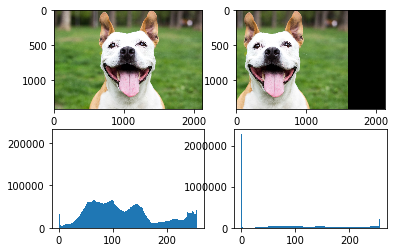

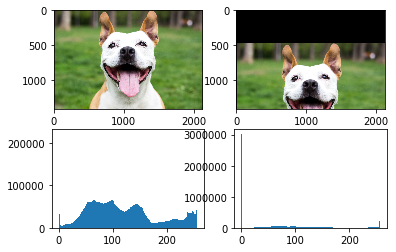

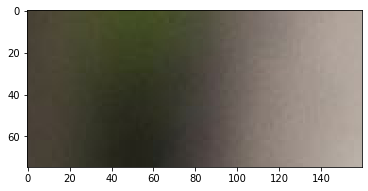

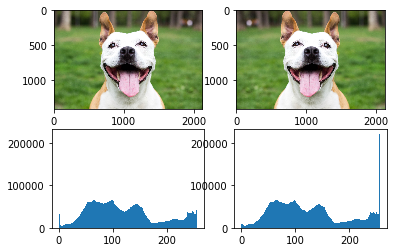

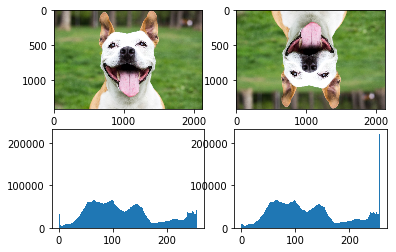

In [22]:
#dogs
directory="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/images/dogs"
directory_save="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/train/dogs/"
directory_save_test="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/test/dogs/"
def application_transformation(directory,directory_save,directory_save_test):
    i=0
    for filename in os.listdir(directory):
        i+=1
        image = Image.open(directory+"/"+filename)
        image=image.resize((300,300))
        image.save(directory_save+filename)
        #image = Image.open(directory+"/"+filename)
        im=np.array(Image.open(directory+"/"+filename), dtype=np.uint8)
        Image.fromarray(rotation(im)).save(directory_save+"Image_rotation"+str(i)+".jpg",'JPEG')
        Image.fromarray(random_crop(im, [100,120])).save(directory_save+"Image_crop"+str(i)+".jpg",'JPEG')
        Image.fromarray(adding_illumination(im,2)).save(directory_save+"Image_illumination"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_x(im)).save(directory_save+"Image_translation_along_x"+str(i)+".jpg",'JPEG')
        Image.fromarray(translation_along_y(im)).save(directory_save+"Image_translation_along_y"+str(i)+".jpg",'JPEG') 
        Image.fromarray((noise(im,0.2)* 255).astype(np.uint8)).save(directory_save+"Image_noise"+str(i)+".jpg",'JPEG') 
        Image.fromarray(zoom(im,2)).save(directory_save+"Image_zoom"+str(i)+".jpg",'JPEG')  
        Image.fromarray(cropping(im)).save(directory_save_test+"Image_cropp"+str(i)+".jpg",'JPEG')  
        Image.fromarray(Horizonta_flipping(im)).save(directory_save_test+"Image_fliph"+str(i)+".jpg",'JPEG')
        Image.fromarray(vertical_flipping(im)).save(directory_save_test+"Image_flipv"+str(i)+".jpg",'JPEG') 
        Image.fromarray(color_modification(im,np.random.randint(1,255))).save(directory_save+"Image_colorm"+str(i)+".jpg",'JPEG') 
application_transformation(directory,directory_save,directory_save_test)  